In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

In [6]:
# import
import numpy as np
import seaborn as sns # iris데이터
import pandas as pd   # 원핫인코딩
from sklearn.preprocessing import LabelEncoder # 라벨인코딩(문자->숫자)
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출로)
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt # 학습과정 시각화

In [4]:
# 데이터 생성 및 전처리 (라벨인코딩만 하고, 원핫인코딩X)

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
# iris.keys()
iris_X = iris.data
iris_y = iris.target        # 라벨 인코딩이 되어 있음
iris_X.shape, iris_y.shape
train_X, test_X,  train_y, test_y = train_test_split(iris_X,iris_y,
                                                    test_size=0.1,
                                                    stratify=iris_y,
                                                    random_state=4)
train_X.shape, test_X.shape,  train_y.shape, test_y.shape

((135, 4), (15, 4), (135,), (15,))

# 1. 기본적인 DNN (원핫인코딩X)

## 방법1

In [16]:
# model = Sequential()
# model.add(Input(4,))
# model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=30, activation='relu'))
# model.add(Dense(units=3, activation='softmax'))
# model.summary() # 파라미터 250+153+93 = 1873개
# 위와 똑같은 구조 생성하기 
model = Sequential([
    Input(4,),
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=3, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                250       
                                                                 
 dense_10 (Dense)            (None, 30)                1530      
                                                                 
 dense_11 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 학습 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 학습
earlyStopping = EarlyStopping(patience=50)  # monitor='val_loss' 기본값
hist = model.fit(train_X, train_y, epochs=1000,
                 validation_split=0.2,
                 callbacks=[earlyStopping])

Epoch 1/1000
4/4 [==============================] - 0s 47ms/step - loss: 1.2171 - accuracy: 0.3426 - val_loss: 1.1502 - val_accuracy: 0.2963
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.1094 - accuracy: 0.3426 - val_loss: 1.0995 - val_accuracy: 0.2963
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.0607 - accuracy: 0.3426 - val_loss: 1.0582 - val_accuracy: 0.3333
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.0214 - accuracy: 0.4815 - val_loss: 1.0340 - val_accuracy: 0.2593
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9894 - accuracy: 0.4259 - val_loss: 1.0060 - val_accuracy: 0.2222
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9582 - accuracy: 0.3704 - val_loss: 0.9757 - val_accuracy: 0.2222
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.9281 - accuracy: 0.3796 - val_loss: 0.9433 - val_accuracy: 0.2222
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2552 - accuracy: 0.9722 - val_loss: 0.2282 - val_accuracy: 0.9630
Epoch 60/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2480 - accuracy: 0.9722 - val_loss: 0.2185 - val_accuracy: 0.9630
Epoch 61/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2430 - accuracy: 0.9815 - val_loss: 0.2133 - val_accuracy: 0.9630
Epoch 62/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2394 - accuracy: 0.9815 - val_loss: 0.2084 - val_accuracy: 0.9630
Epoch 63/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2330 - accuracy: 0.9815 - val_loss: 0.2097 - val_accuracy: 0.9630
Epoch 64/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2279 - accuracy: 0.9722 - val_loss: 0.2102 - val_accuracy: 0.9630
Epoch 65/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2240 - accuracy: 0.9722 - val_loss: 0.2048 - val_accuracy: 0.9630
Epoch 

4/4 [==============================] - 0s 11ms/step - loss: 0.0810 - accuracy: 0.9815 - val_loss: 0.0999 - val_accuracy: 0.9630
Epoch 174/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0764 - accuracy: 0.9815 - val_loss: 0.0874 - val_accuracy: 0.9630
Epoch 175/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0699 - accuracy: 0.9907 - val_loss: 0.0852 - val_accuracy: 0.9259
Epoch 176/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0757 - accuracy: 0.9815 - val_loss: 0.0852 - val_accuracy: 0.9259
Epoch 177/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0732 - accuracy: 0.9907 - val_loss: 0.0859 - val_accuracy: 0.9630
Epoch 178/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0699 - accuracy: 0.9907 - val_loss: 0.0852 - val_accuracy: 0.9259
Epoch 179/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0708 - accuracy: 0.9907 - val_loss: 0.0849 - val_accuracy: 0.9259
Epoch 180/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.0565 - accuracy: 0.9907 - val_loss: 0.0817 - val_accuracy: 0.9259
Epoch 288/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0569 - accuracy: 0.9907 - val_loss: 0.0826 - val_accuracy: 0.9259
Epoch 289/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0648 - accuracy: 0.9907 - val_loss: 0.0903 - val_accuracy: 0.9630
Epoch 290/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0628 - accuracy: 0.9907 - val_loss: 0.0816 - val_accuracy: 0.9259
Epoch 291/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0564 - accuracy: 0.9907 - val_loss: 0.0816 - val_accuracy: 0.9259
Epoch 292/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0572 - accuracy: 0.9907 - val_loss: 0.0817 - val_accuracy: 0.9259
Epoch 293/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0555 - accuracy: 0.9907 - val_loss: 0.0830 - val_accuracy: 0.9259
Epoch 294/1000

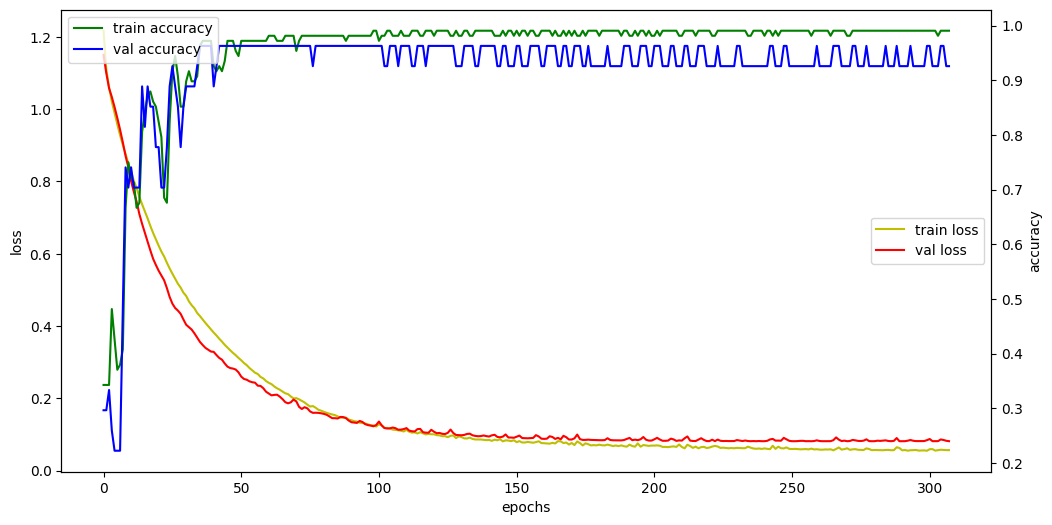

In [18]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(loc='upper left')
plt.show()

# 2. sklearn 이용
- 원핫인코딩을 하지 않고 라벨인코딩까지만 해야 작동. numpy배열 


In [20]:
from sklearn.neural_network import MLPClassifier

In [22]:
# 머신러닝 3장 교안 43page
mlp_model = MLPClassifier(hidden_layer_sizes=(50,30),
                      activation='relu',
                      solver='adam',
                      alpha=0.0001,               # 과적합 방지 강도
                      batch_size=40,
                      max_iter=1000,              # epoch (학습횟수)
                      early_stopping=True,        # 조기 종료 활성화
                      n_iter_no_change=50,        # patience
                      warm_start=False,           # True일 경우 이전학습에 이어서 학습, False는 fit(학습)할 때 마다 새롭게 
                      validation_fraction=0.1    # 검증셋 비율
                      )

In [23]:
mlp_model.fit(train_X,train_y)

MLPClassifier(batch_size=40, early_stopping=True, hidden_layer_sizes=(50, 30),
              max_iter=1000, n_iter_no_change=50)

In [29]:
# 모델 평가 : accuracy(test_X, test_y), recall, precision(test_y, yhat)
from sklearn.metrics import recall_score, precision_score
accuracy = mlp_model.score(test_X,test_y)
yhat = mlp_model.predict(test_X)
recall = recall_score(test_y, yhat, average='weighted')
precision = precision_score(test_y, yhat, average='weighted')
print('정확도 :', accuracy)
print('재현율 :', recall)
print('정밀도 :', precision)
print('교차표 :\n', pd.crosstab(test_y, yhat,
                            rownames=['실제'],
                            colnames=['예측']))

정확도 : 0.8666666666666667
재현율 : 0.8666666666666667
정밀도 : 0.9047619047619048
교차표 :
 예측  0  1  2
실제         
0   5  0  0
1   0  3  2
2   0  0  5


# 3.클래스 이용

In [31]:
class DNNClassifiter:
    @staticmethod
    def build(input_dim=4, activation='relu', optimizer='adam'):
        # 모델 구성 
#         model = Sequential()
#         model.add(Input(input_dim,))
#         model.add(Dense(50, activation=activation))
#         model.add(Dense(30, activation=activation))
#         model.add(Dense(3, activation='softmax'))
        model = Sequential([
            Input(input_dim,),
            Dense(50, activation=activation),
            Dense(30, activation=activation),
            Dense(3, activation='softmax')
        ])
        # 모델 학습 과정 설정
        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy']
                     )
        return model

In [34]:
# 모델
model = DNNClassifiter.build(input_dim=4, activation='relu')
model.summary()
# 모델 학습
model.fit(train_X, train_y,
          epochs=500,
          validation_split=0.2,)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                250       
                                                                 
 dense_19 (Dense)            (None, 30)                1530      
                                                                 
 dense_20 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 49ms/step - loss: 1.2385 - accuracy: 0.2870 - val_loss: 1.2328 - val_accuracy: 0.2593
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 1.1630 - accuracy: 0.3333 - val_loss: 1.2481 - val_accuracy: 0.2222
Epoch 3/500
4/4 [===================

4/4 [==============================] - 0s 11ms/step - loss: 0.1036 - accuracy: 0.9907 - val_loss: 0.0917 - val_accuracy: 0.9630
Epoch 112/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1065 - accuracy: 0.9815 - val_loss: 0.0943 - val_accuracy: 0.9630
Epoch 113/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0983 - accuracy: 0.9907 - val_loss: 0.0904 - val_accuracy: 0.9259
Epoch 114/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1016 - accuracy: 0.9907 - val_loss: 0.0899 - val_accuracy: 0.9259
Epoch 115/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0980 - accuracy: 0.9907 - val_loss: 0.0908 - val_accuracy: 0.9630
Epoch 116/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0978 - accuracy: 0.9815 - val_loss: 0.0944 - val_accuracy: 0.9630
Epoch 117/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0970 - accuracy: 0.9815 - val_loss: 0.0921 - val_accuracy: 0.9630
Epoch 118/500
4/4 [=

Epoch 169/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0741 - accuracy: 0.9907 - val_loss: 0.0744 - val_accuracy: 0.9259
Epoch 170/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0713 - accuracy: 0.9907 - val_loss: 0.0739 - val_accuracy: 0.9259
Epoch 171/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0728 - accuracy: 0.9907 - val_loss: 0.0761 - val_accuracy: 0.9630
Epoch 172/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0699 - accuracy: 0.9907 - val_loss: 0.0748 - val_accuracy: 0.9630
Epoch 173/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0691 - accuracy: 0.9907 - val_loss: 0.0737 - val_accuracy: 0.9259
Epoch 174/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0696 - accuracy: 0.9907 - val_loss: 0.0743 - val_accuracy: 0.9630
Epoch 175/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0684 - accuracy: 0.9907 - val_loss: 0.0766 - val_accuracy: 0.9630
Epoch 

Epoch 227/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0653 - accuracy: 0.9815 - val_loss: 0.0716 - val_accuracy: 0.9259
Epoch 228/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0623 - accuracy: 0.9907 - val_loss: 0.0719 - val_accuracy: 0.9259
Epoch 229/500
4/4 [==============================] - 0s 13ms/step - loss: 0.0585 - accuracy: 0.9907 - val_loss: 0.0742 - val_accuracy: 0.9630
Epoch 230/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0606 - accuracy: 0.9907 - val_loss: 0.0756 - val_accuracy: 0.9630
Epoch 231/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0613 - accuracy: 0.9907 - val_loss: 0.0731 - val_accuracy: 0.9630
Epoch 232/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0610 - accuracy: 0.9907 - val_loss: 0.0716 - val_accuracy: 0.9259
Epoch 233/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0591 - accuracy: 0.9907 - val_loss: 0.0724 - val_accuracy: 0.9630
Epoch 

Epoch 285/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0582 - accuracy: 0.9907 - val_loss: 0.0766 - val_accuracy: 0.9630
Epoch 286/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0555 - accuracy: 0.9907 - val_loss: 0.0734 - val_accuracy: 0.9259
Epoch 287/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0550 - accuracy: 0.9907 - val_loss: 0.0738 - val_accuracy: 0.9259
Epoch 288/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0554 - accuracy: 0.9907 - val_loss: 0.0736 - val_accuracy: 0.9259
Epoch 289/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0544 - accuracy: 0.9907 - val_loss: 0.0733 - val_accuracy: 0.9259
Epoch 290/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0555 - accuracy: 0.9907 - val_loss: 0.0736 - val_accuracy: 0.9259
Epoch 291/500
4/4 [==============================] - 0s 14ms/step - loss: 0.0573 - accuracy: 0.9907 - val_loss: 0.0747 - val_accuracy: 0.9259
Epoch 

Epoch 343/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0517 - accuracy: 0.9907 - val_loss: 0.0762 - val_accuracy: 0.9259
Epoch 344/500
4/4 [==============================] - 0s 14ms/step - loss: 0.0505 - accuracy: 0.9907 - val_loss: 0.0763 - val_accuracy: 0.9259
Epoch 345/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0512 - accuracy: 0.9907 - val_loss: 0.0782 - val_accuracy: 0.9630
Epoch 346/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0527 - accuracy: 0.9907 - val_loss: 0.0792 - val_accuracy: 0.9630
Epoch 347/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0520 - accuracy: 0.9907 - val_loss: 0.0764 - val_accuracy: 0.9259
Epoch 348/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0498 - accuracy: 0.9907 - val_loss: 0.0772 - val_accuracy: 0.9259
Epoch 349/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0519 - accuracy: 0.9907 - val_loss: 0.0831 - val_accuracy: 0.9630
Epoch 

Epoch 401/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0514 - accuracy: 0.9815 - val_loss: 0.0799 - val_accuracy: 0.9259
Epoch 402/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0488 - accuracy: 0.9907 - val_loss: 0.0810 - val_accuracy: 0.9259
Epoch 403/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0508 - accuracy: 0.9907 - val_loss: 0.0815 - val_accuracy: 0.9259
Epoch 404/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0489 - accuracy: 0.9907 - val_loss: 0.0799 - val_accuracy: 0.9259
Epoch 405/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0573 - accuracy: 0.9815 - val_loss: 0.0870 - val_accuracy: 0.9630
Epoch 406/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0540 - accuracy: 0.9815 - val_loss: 0.0803 - val_accuracy: 0.9259
Epoch 407/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0485 - accuracy: 0.9907 - val_loss: 0.0814 - val_accuracy: 0.9259
Epoch 

Epoch 459/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0503 - accuracy: 0.9907 - val_loss: 0.0847 - val_accuracy: 0.9259
Epoch 460/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0491 - accuracy: 0.9907 - val_loss: 0.0825 - val_accuracy: 0.9259
Epoch 461/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0469 - accuracy: 0.9907 - val_loss: 0.0827 - val_accuracy: 0.9259
Epoch 462/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0486 - accuracy: 0.9907 - val_loss: 0.0827 - val_accuracy: 0.9259
Epoch 463/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0459 - accuracy: 0.9907 - val_loss: 0.0850 - val_accuracy: 0.9259
Epoch 464/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0523 - accuracy: 0.9907 - val_loss: 0.0868 - val_accuracy: 0.9630
Epoch 465/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0490 - accuracy: 0.9907 - val_loss: 0.0829 - val_accuracy: 0.9259
Epoch 

In [35]:
loss, accuracy = model.evaluate(train_X,train_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9778


# 4. 함수형 API 이용하기 
- 병렬처리 : 속도 높이려고
- 레지듀얼블럭(Residual block) : 모델의 성능을 높이려고(자연어처리, 이미지 처리)

In [39]:
# import
import numpy as np
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출로)
from tensorflow.keras import Model # 모델 생성(입력층과 출력층을 이용)
from tensorflow.keras.layers import Dense, Dropout, Input, add # 레지듀얼블럭에서 add 사용
from tensorflow.keras.layers import concatenate  # 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt # 학습과정 시각화


In [36]:
from sklearn import datasets
iris = datasets.load_iris()
# iris.keys()
iris_X = iris.data
iris_y = iris.target # 라벨인코딩이 되어 있음
iris_X.shape, iris_y.shape
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                   test_size=0.1,
                                                   stratify=iris_y,
                                                   random_state=4)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((135, 4), (135,), (15, 4), (15,))

In [40]:
# 기존의 model 스타일 4 -> 50 -> 30 -> 3
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=30, activation='relu')(dense1)
dense3 = Dense(units=3, activation='softmax')(dense2)
model = Model(inputs=input_, outputs=dense3)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(train_X, train_y, epochs=20,
         validation_split=0.2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_24 (Dense)            (None, 50)                250       
                                                                 
 dense_25 (Dense)            (None, 30)                1530      
                                                                 
 dense_26 (Dense)            (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
4/4 [==============================] - 0s 47ms/step - loss: 2.5521 - accuracy: 0.3426 - val_loss: 2.0179 - val_accuracy: 0.2963
Epoch 2/20
4/4 [==============================] - 0s

In [41]:
# 병렬처리
# 4 -> 160(병렬처리 50,80,30) -> 32 -> 3
input = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=80, activation='relu')(input_)
dense3 = Dense(units=30, activation='relu')(input_)
x = concatenate([dense1, dense2, dense3]) # 요소별 연결
# x = Dense(160, activation='relu')(input_)의 병렬처리
dense4 = Dense(32, activation='relu')(x)
output = Dense(3, activation='softmax')(dense4)
model = Model(inputs=input_, outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_27 (Dense)               (None, 50)           250         ['input_9[0][0]']                
                                                                                                  
 dense_28 (Dense)               (None, 80)           400         ['input_9[0][0]']                
                                                                                                  
 dense_29 (Dense)               (None, 30)           150         ['input_9[0][0]']                
                                                                                            

In [43]:
# 레지쥬얼블록(Residual Block):딥러닝에서 딥한 네트워크가 학습이 잘 되지않을 때 사용
# 4 -> 50 -> 50 -> (레지듀얼) -> 3
input_ = Input(shape=(4,))
dense1 = Dense(50, activation='relu')(input_)
dense2 = Dense(50, activation='relu')(dense1)
dense3 = add([dense1, dense2]) # 요소별 합
output = Dense(3, activation='softmax')(dense3)
model = Model(inputs=input_,outputs=output)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )
model.fit(train_X, train_y, epochs=500,
          validation_split=0.2, verbose=0)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 4)]          0           []                               
                                                                                                  
 dense_35 (Dense)               (None, 50)           250         ['input_12[0][0]']               
                                                                                                  
 dense_36 (Dense)               (None, 50)           2550        ['dense_35[0][0]']               
                                                                                                  
 add_1 (Add)                    (None, 50)           0           ['dense_35[0][0]',               
                                                                  'dense_36[0][0]']         

In [44]:
model.evaluate(test_X,test_y)

1/1 [==============================] - 0s 22ms/step - loss: 0.0276 - accuracy: 1.0000


[0.027554957196116447, 1.0]